# Atividade da Semana 10

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

In [2]:
# Instalando o pacote 'ipeadatapy'
!pip install ipeadatapy

In [3]:
# Carregando pacotes
import pandas as pd
import ipeadatapy
import matplotlib.pyplot as plt

# Obtendo serie com dados sobre emplacamento de veículos
emplacamentos = ipeadatapy.timeseries('ANFAVE12_LICVEN12')
emplacamentos.reset_index(inplace=True)
emplacamentos = emplacamentos.loc[(
    emplacamentos["DATE"] >= "2015-01-01") & (emplacamentos["DATE"] < "2019-01-01"),
                                  "VALUE (-)"]
emplacamentos.rename("emplacamentos", inplace=True)

# Obtendo serie com dados sobre IPI arrecadado sobre automóveis
ipi = ipeadatapy.timeseries('SRF12_IPI12')
ipi.reset_index(inplace=True)
ipi = ipi.loc[(ipi["DATE"] >= "2015-01-01") & (ipi["DATE"] < "2019-01-01"),
                                  "VALUE (R$)"]
ipi.rename("ipi", inplace=True)

carros = pd.concat([emplacamentos.reset_index(drop=True),
                    ipi.reset_index(drop=True)],
                   axis=1)
carros

,emplacamentos,ipi
0,208143.0,5420.927715
1,154923.0,3487.420789
2,196859.0,3863.072262
3,183761.0,4112.753906
4,180314.0,3887.146935
5,179639.0,3906.958252
6,189936.0,4018.125247
7,173864.0,3944.719600
8,167704.0,4298.873473
9,162069.0,4205.357606


###Questão 1

Vamos relembrar o seguinte:

> O número de veículos emplacados (ou seja, veículos que foram comprados novos) funciona como um indicador econômico que demonstra o poder aquisitivo da população em geral. Estes dados também são úteis como indicadores de saúde, uma vez que, uma frota mais nova, polui menos o ar e o número de casos de doenças respiratórias em grandes centros é reduzido.

> O Imposto sobre Produtos Industrializados, cuja sigla é IPI, é um imposto federal, ou seja, somente a União pode instituí-lo ou modificá-lo, sobre produtos industrializados no Brasil.

É possível utilizar uma regressão linear para estimar o `IPI` utilizando o `número de veículos emplacados`? Argumente utilizando alguma medida estatística para este fim.


In [8]:
# Questao 1




###Questão 2

Crie uma base de `treinamento` e de `teste` para o ajuste de um modelo linear. Utilize 70% dos dados como conjunto de treinamento.


In [9]:
# Questao 2
from sklearn.model_selection import train_test_split

# Definindo conjunto de treino e teste simultaneamente
# Aqui, o conjunto de treino sera 80% dos dados
treino, teste = train_test_split(carros ,
                                 train_size = 0.70,
                                 random_state = 123)
# random_state = 123 foi escolhido aleatoriamente
# use o numero que achar melhor

print('DataFrame de treino (70%): ',treino.shape)
print('DataFrame de teste (30%): ',teste.shape)
print("DataFrame Original - df_qtd_tempo(100%): ", carros.shape)





DataFrame de treino (70%):  (33, 2)
DataFrame de teste (30%):  (15, 2)
DataFrame Original - df_qtd_tempo(100%):  (48, 2)


###Questão 3

Treine o modelo linear utilizando a base de `treino`.

In [12]:
# Questao 3
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(treino['emplacamentos'])
y_treino = treino['ipi']

# Definindo o modelo de regressao linear
reg = LinearRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino,
                          y = y_treino)

print(modelo_estimado)



LinearRegression()


###Questão 4

Avalie a `performance` do modelo estimado através do **coeficiente de determinação** $R^2$.
*    Qual percentual de variabilidade do `IPI` é explicado pelo `número de emplacamentos`?
*    O que esse valor calculado representa?


In [13]:
# Questao 4

modelo_estimado.score(X = X_treino, y = y_treino)


0.5580980594176892

###Questão 5

Faça a previsão para o conjunto de teste.
*    Calcule o $R^2$ para estes resultados
*    Faça o gráfico que exibe os dados observados e a reta estimada pelo modelo linear

1630.905739124983
0.014813598940490653
[3954.68537772 3483.67218581 4123.26413366 4490.77470978 4103.79906466
 4232.67737544 4453.11854127 4115.20553584 4452.46674292 4292.0058392
 3925.87292778 4444.54146749 3695.34370107 4398.94520995 3559.310422  ]


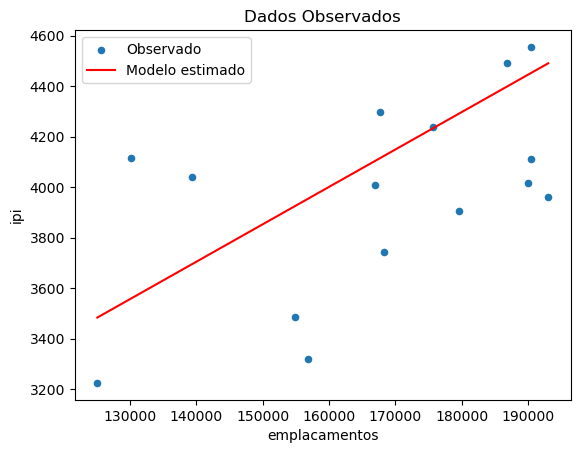

In [21]:
# Questao 5


# alfa (tambem chamado de intercepto)
alfa = modelo_estimado.intercept_

# beta
beta = modelo_estimado.coef_[1]

print(alfa)
print(beta)


# Definindo input e output - teste
X_teste = sm.add_constant(teste['emplacamentos'])
y_teste = teste['ipi']

# Previsao
previsao = modelo_estimado.predict(X = X_teste)
print(previsao)


#calculo R2
modelo_estimado.score(X = X_teste, y = y_teste)


# Grafico de dispersao - conjunto de teste
teste.plot.scatter(x = 'emplacamentos', y = 'ipi', label='Observado')

# Desenhando a linha de previsao
x_prev = np.linspace(teste['emplacamentos'].min(),
                     teste['emplacamentos'].max(),
                     100).reshape(-1, 1)
y_prev = alfa + beta * x_prev
plt.plot(x_prev, y_prev, color='red', label='Modelo estimado')

# Rotulos e titulo
plt.xlabel("emplacamentos")
plt.ylabel("ipi")
plt.title('Dados Observados')

# Legenda
plt.legend()

# Exibindo o grafico
plt.show()